In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [2]:
df = sns.load_dataset('iris')

In [3]:

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()
df = df.drop_duplicates()

In [7]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

In [8]:
df['species'] = df['species'].replace({'setosa':1, 'versicolor':2, 'virginica':0})
df['species'] = df['species'].astype('int64')

C:\Users\MD Maruf\AppData\Local\Temp\ipykernel_2620\3297486683.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({'setosa':1, 'versicolor':2, 'virginica':0})


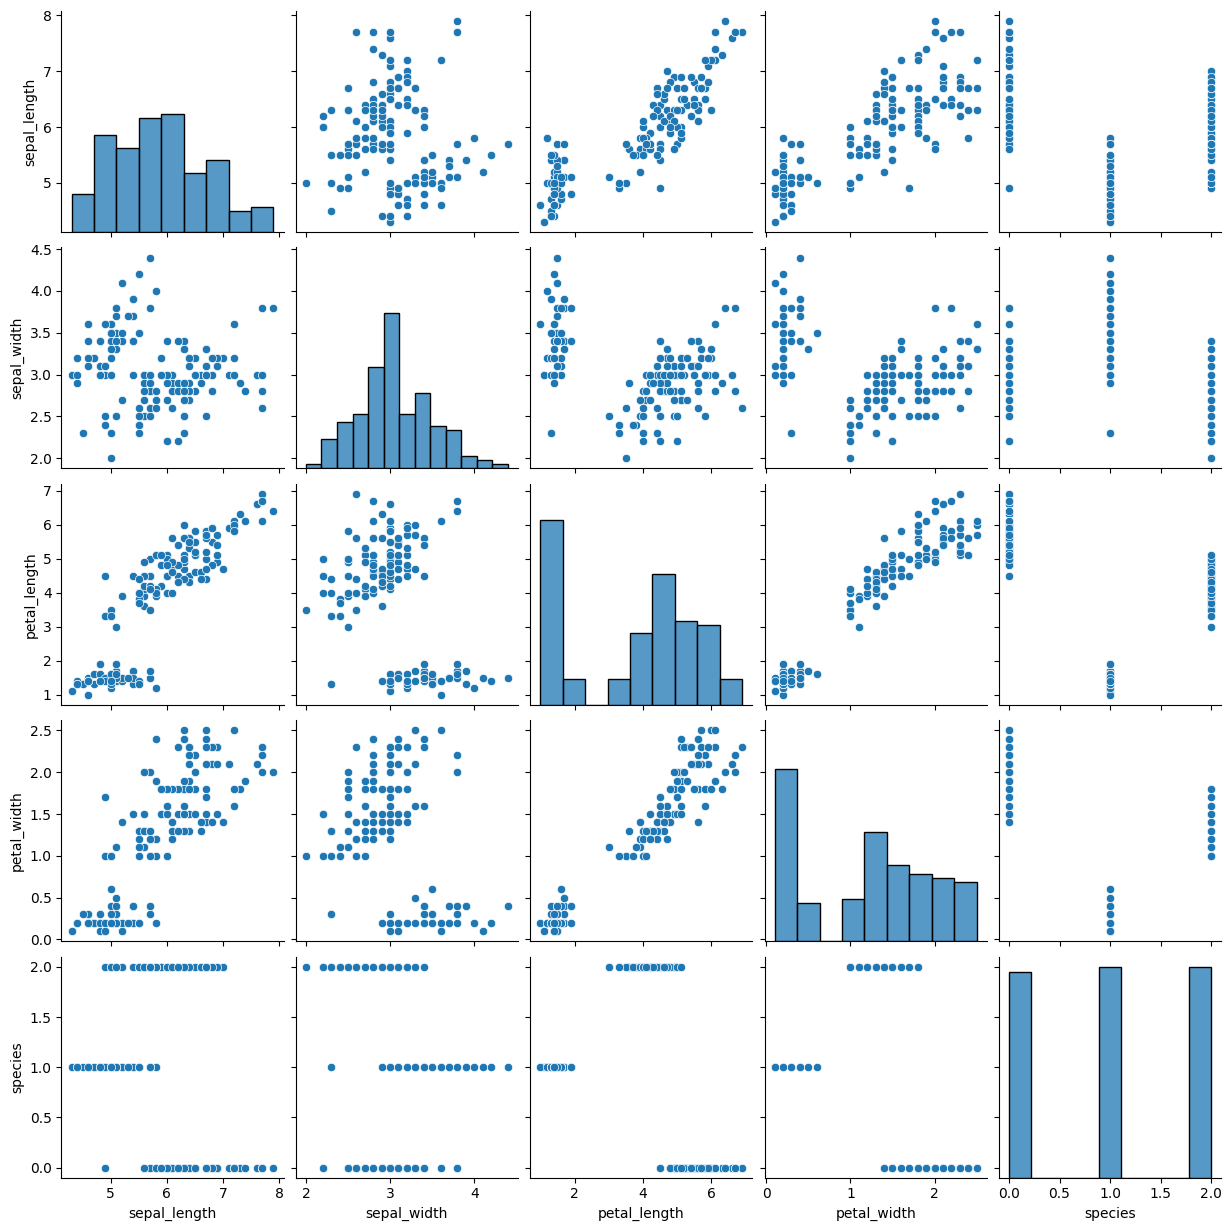

In [9]:
sns.pairplot(df)
plt.show()

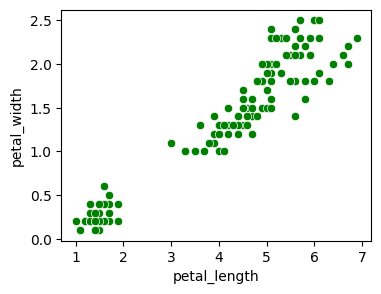

In [10]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=df, x='petal_length', y='petal_width', color='green')
plt.show()

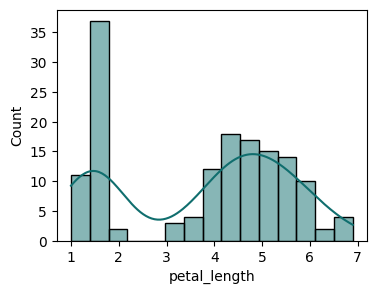

In [11]:
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='petal_length', color="#106E6E", kde=True, bins=15)
plt.show()

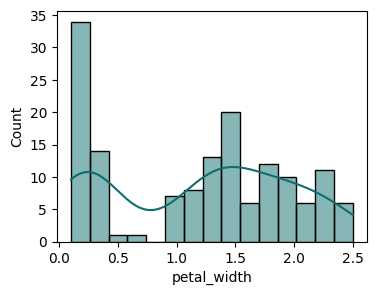

In [12]:
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='petal_width', color="#106E6E", kde=True, bins=15)
plt.show()

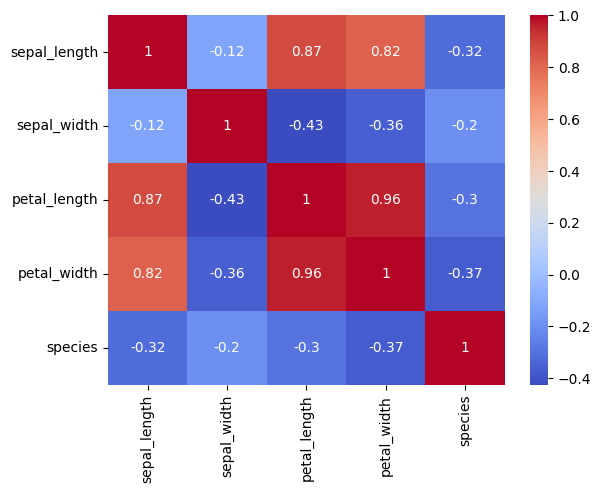

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [14]:
km = KMeans()
model = km.fit(df[['petal_length','petal_width']])
model

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [15]:
pred = model.predict(df[['petal_length','petal_width']])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 6, 6, 1, 3, 6, 6, 6, 7, 6, 3, 7, 6, 3, 6, 3, 6,
       6, 3, 6, 3, 1, 3, 1, 6, 6, 6, 6, 1, 6, 7, 3, 3, 3, 1, 6, 6, 6, 6,
       3, 3, 6, 6, 3, 7, 3, 3, 3, 6, 7, 3, 2, 1, 2, 4, 2, 5, 6, 5, 4, 2,
       1, 4, 4, 1, 4, 4, 4, 5, 5, 1, 2, 1, 5, 1, 2, 5, 1, 1, 4, 4, 5, 5,
       2, 1, 4, 2, 2, 4, 1, 4, 2, 4, 2, 2, 4, 1, 4, 4, 1], dtype=int32)

In [16]:
df['pred_plus'] = pred
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species,pred_plus
139,6.9,3.1,5.4,2.1,0,4
140,6.7,3.1,5.6,2.4,0,2
141,6.9,3.1,5.1,2.3,0,4
143,6.8,3.2,5.9,2.3,0,2
144,6.7,3.3,5.7,2.5,0,2
145,6.7,3.0,5.2,2.3,0,4
146,6.3,2.5,5.0,1.9,0,1
147,6.5,3.0,5.2,2.0,0,4
148,6.2,3.4,5.4,2.3,0,4
149,5.9,3.0,5.1,1.8,0,1


In [17]:
cluster_1 = model.cluster_centers_
cluster_1

array([[1.462     , 0.246     ],
       [4.96470588, 1.75882353],
       [5.80833333, 2.31666667],
       [3.98235294, 1.21176471],
       [5.43125   , 2.        ],
       [6.4625    , 2.0125    ],
       [4.52083333, 1.425     ],
       [3.32      , 1.02      ]])

In [18]:
df0 = df[df['pred_plus'] == 0]
df1 = df[df['pred_plus'] == 1]
df2 = df[df['pred_plus'] == 2]
df3 = df[df['pred_plus'] == 3]
df4 = df[df['pred_plus'] == 4]
df5 = df[df['pred_plus'] == 5]
df6 = df[df['pred_plus'] == 6]
df7 = df[df['pred_plus'] == 7]

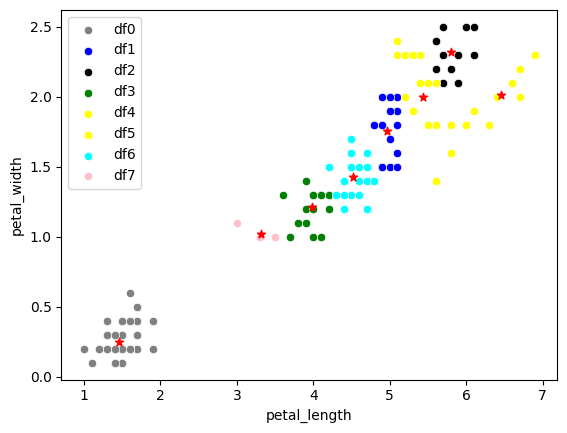

In [19]:
sns.scatterplot(x=df0.petal_length, y=df0.petal_width, color='gray', label='df0')
sns.scatterplot(x=df1.petal_length, y=df1.petal_width, color='blue', label='df1')
sns.scatterplot(x=df2.petal_length, y=df2.petal_width, color='black', label='df2')
sns.scatterplot(x=df3.petal_length, y=df3.petal_width, color='green', label='df3')
sns.scatterplot(x=df4.petal_length, y=df4.petal_width, color='yellow', label='df4')
sns.scatterplot(x=df5.petal_length, y=df5.petal_width, color='yellow', label='df5')
sns.scatterplot(x=df6.petal_length, y=df6.petal_width, color='cyan', label='df6')
sns.scatterplot(x=df7.petal_length, y=df7.petal_width, color='pink', label='df7')

plt.scatter(cluster_1[:,0], cluster_1[:, 1], color='red', label='Cluster', marker='*')
plt.show()

In [20]:
wcss = []
clus = range(2,15)
for k in clus:
    kme = KMeans(n_clusters=k)
    kme.fit(df[['petal_length','petal_width']])
    wcss.append(kme.inertia_)

In [21]:
wcss

[86.31128251300518,
 31.100968903436986,
 19.278502923976603,
 13.979985576923069,
 11.027404929887995,
 9.325772362902796,
 7.709168487341541,
 6.414068070818072,
 5.64332205234379,
 5.319402357446474,
 5.720448815073811,
 4.438304473304473,
 4.584402194211016]

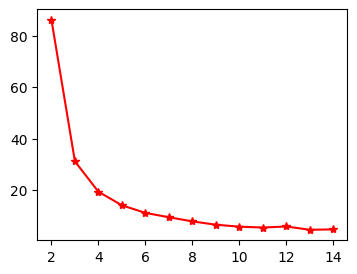

In [22]:
plt.figure(figsize=(4,3))
plt.plot(clus, wcss, color='red', marker='*')
plt.show()

In [23]:
knl = KneeLocator(clus, wcss, direction='decreasing', curve='convex')

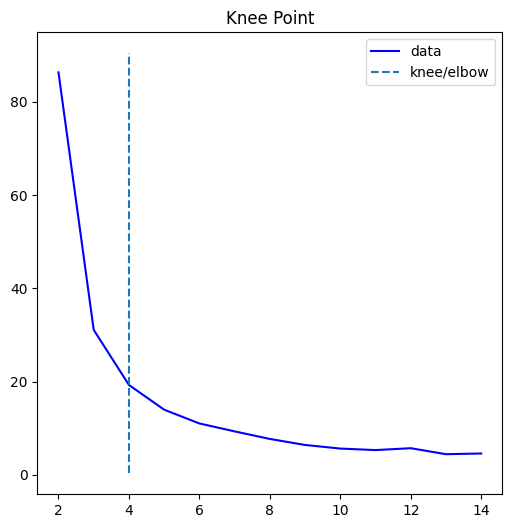

In [24]:
knl.plot_knee()

In [28]:
km_f = KMeans(n_clusters=4, algorithm='elkan')
final_model = km_f.fit(df[['petal_length','petal_width']])
final_model

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'elkan'


In [29]:
pred_f = final_model.predict(df[['petal_length','petal_width']])
pred_f

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1,
       1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [32]:
df['final_pred_plus'] = pred_f
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species,pred_plus,final_pred_plus
145,6.7,3.0,5.2,2.3,0,4,2
146,6.3,2.5,5.0,1.9,0,1,1
147,6.5,3.0,5.2,2.0,0,4,2
148,6.2,3.4,5.4,2.3,0,4,2
149,5.9,3.0,5.1,1.8,0,1,1


In [25]:
'''k = 8
# ইউনিক ক্লাস্টার লেবেলগুলো sort করে নেওয়া
clusters = sorted(df['pred_plus'].unique())  # প্রতিটা ক্লাস্টার লেবেল সংগ্রহ

# প্রতিটা ক্লাস্টারের জন্য loop চালানো
for c in clusters:
    dfc = df[df['pred_plus'] == c]            # নির্দিষ্ট ক্লাস্টারের ডেটা ফিল্টার
    plt.scatter(
        dfc.petal_length,                     # x-axis এ petal_length
        dfc.petal_width,                      # y-axis এ petal_width
        label=f'Cluster {c}'                  # লেবেল সেট করা
    )

# centroid plot করা
plt.scatter(
    cluster_1[:, 0],                           # centroid এর x coordinate
    cluster_1[:, 1],                           # centroid এর y coordinate
    marker='*',                                # তারকা চিহ্ন
    s=200,                                     # সাইজ বড় করা
    label='Centroid'
)

plt.legend()                                   # legend দেখানো
plt.show()                                     # গ্রাফ দেখানো'''


"k = 8\n# ইউনিক ক্লাস্টার লেবেলগুলো sort করে নেওয়া\nclusters = sorted(df['pred_plus'].unique())  # প্রতিটা ক্লাস্টার লেবেল সংগ্রহ\n\n# প্রতিটা ক্লাস্টারের জন্য loop চালানো\nfor c in clusters:\n    dfc = df[df['pred_plus'] == c]            # নির্দিষ্ট ক্লাস্টারের ডেটা ফিল্টার\n    plt.scatter(\n        dfc.petal_length,                     # x-axis এ petal_length\n        dfc.petal_width,                      # y-axis এ petal_width\n        label=f'Cluster {c}'                  # লেবেল সেট করা\n    )\n\n# centroid plot করা\nplt.scatter(\n    cluster_1[:, 0],                           # centroid এর x coordinate\n    cluster_1[:, 1],                           # centroid এর y coordinate\n    marker='*',                                # তারকা চিহ্ন\n    s=200,                                     # সাইজ বড় করা\n    label='Centroid'\n)\n\nplt.legend()                                   # legend দেখানো\nplt.show()                                     # গ্রাফ দেখানো"